# Data Preparation
The raw data collected from the Arquivo.pt API should be cleaned and prepared for the further data analysis and search system implementarion in posterior stages of the project. Therefore all the data, especially the textual one, should be normalized to fit better search criteria.

Firstly we import all of the relevant packages for the data cleanup.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Preliminary Data Analysis:
We start by examining the data collected to better grasp it's extent and content.

In [3]:
df = pd.read_json("ps.json")
df.shape

(35432, 5)

In [69]:
df.columns

Index(['date', 'link', 'contentLength', 'type', 'text'], dtype='object')

#### Data Preview:

In [4]:
df.head()

,date,link,contentLength,type,text
0,2017-02-22 18:39:09,https://arquivo.pt/wayback/20170222183909/http...,0,text/html,
1,2017-06-08 03:35:16,https://arquivo.pt/wayback/20170608033516/http...,0,text/html,
2,2018-05-22 09:34:02,https://arquivo.pt/wayback/20180522093402/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xml\nSitemap: ht...
3,2018-05-24 01:49:12,https://arquivo.pt/wayback/20180524014912/http...,28055,application/pdf,\n \nXXI CONGRESO NACIONAL DO PARTIDO SOCIALI...
4,2018-05-24 01:48:28,https://arquivo.pt/wayback/20180524014828/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xml\nSitemap: ht...


### Cleaning Unrecognized Characters in Data:

Our text field has multiple unrecognized characters and escape sequences that are unuseful so we removed them.

In [5]:
df["text"].str.replace("[\n\t\r]"," ",regex=True)
df["text"].str.replace(" +"," ",regex=True)
df.head()

,date,link,contentLength,type,text
0,2017-02-22 18:39:09,https://arquivo.pt/wayback/20170222183909/http...,0,text/html,
1,2017-06-08 03:35:16,https://arquivo.pt/wayback/20170608033516/http...,0,text/html,
2,2018-05-22 09:34:02,https://arquivo.pt/wayback/20180522093402/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xml\nSitemap: ht...
3,2018-05-24 01:49:12,https://arquivo.pt/wayback/20180524014912/http...,28055,application/pdf,\n \nXXI CONGRESO NACIONAL DO PARTIDO SOCIALI...
4,2018-05-24 01:48:28,https://arquivo.pt/wayback/20180524014828/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xml\nSitemap: ht...


### Analysing Null Values:
Since our dataset is collected using the Arquivo.pt API, no null values are considered globally.

In [6]:
df.isnull().sum().sum()

0

#### Checking Empty Text Fields:

In [7]:
df[df["text"]==""]

,date,link,contentLength,type,text
0,2017-02-22 18:39:09,https://arquivo.pt/wayback/20170222183909/http...,0,text/html,
1,2017-06-08 03:35:16,https://arquivo.pt/wayback/20170608033516/http...,0,text/html,
43,2018-07-21 18:41:09,https://arquivo.pt/wayback/20180721184109/http...,0,text/html,
45,2018-07-21 18:53:02,https://arquivo.pt/wayback/20180721185302/http...,0,text/html,
50,2018-07-28 03:02:21,https://arquivo.pt/wayback/20180728030221/http...,0,text/html,
...,...,...,...,...,...
35421,2020-12-30 21:23:40,https://arquivo.pt/wayback/20201230212340/http...,0,application/json,
35427,2021-01-01 02:18:45,https://arquivo.pt/wayback/20210101021845/http...,0,text/html,
35429,2021-01-01 02:17:27,https://arquivo.pt/wayback/20210101021727/http...,0,application/json,
35430,2021-01-01 02:16:46,https://arquivo.pt/wayback/20210101021646/http...,0,application/json,


#### Replacing Empty Text With Null Values:

In [8]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df

,date,link,contentLength,type,text
0,2017-02-22 18:39:09,https://arquivo.pt/wayback/20170222183909/http...,0,text/html,NaN
1,2017-06-08 03:35:16,https://arquivo.pt/wayback/20170608033516/http...,0,text/html,NaN
2,2018-05-22 09:34:02,https://arquivo.pt/wayback/20180522093402/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xml\nSitemap: ht...
3,2018-05-24 01:49:12,https://arquivo.pt/wayback/20180524014912/http...,28055,application/pdf,\n \nXXI CONGRESO NACIONAL DO PARTIDO SOCIALI...
4,2018-05-24 01:48:28,https://arquivo.pt/wayback/20180524014828/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xml\nSitemap: ht...
...,...,...,...,...,...
35427,2021-01-01 02:18:45,https://arquivo.pt/wayback/20210101021845/http...,0,text/html,NaN
35428,2021-01-01 02:18:04,https://arquivo.pt/wayback/20210101021804/http...,2567,text/html,Nota de pesar pela morte de Eduardo Lourenço –...
35429,2021-01-01 02:17:27,https://arquivo.pt/wayback/20210101021727/http...,0,application/json,NaN
35430,2021-01-01 02:16:46,https://arquivo.pt/wayback/20210101021646/http...,0,application/json,NaN


#### Number of Missing Data:

In [9]:
total = df.isnull().sum()
percent = df.isnull().sum()/df.isnull().count()*100.0
missing_data = pd.concat([total, percent], axis=1, keys=['Number', 'Percent'])
missing_data

,Number,Percent
date,0,0.000000
link,0,0.000000
contentLength,0,0.000000
type,0,0.000000
text,17854,50.389478


#### Missing Text per Website Type:

application/json                 13783
text/html                         2593
text/calendar                      731
application/vnd.ms-fontobject      448
application/octet-stream           290
application/pdf                      9
Name: type, dtype: int64


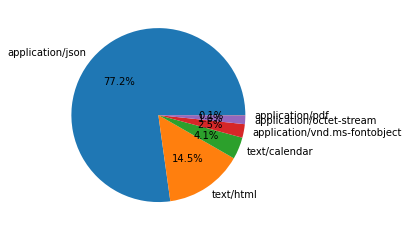

In [71]:
missing_values = df.loc[df['text'].isnull(), 'type']
missing_values_labels = missing_values.value_counts().keys().to_list()
print(missing_values.value_counts())

fig1, ax1 = plt.subplots()
ax1.pie(missing_values.value_counts(),labels=missing_values_labels,autopct='%.1f%%')
plt.show()

#### Removing Missing Text Lines:

In [75]:
df.dropna()

,date,link,contentLength,type,text
2,2018-05-22 09:34:02,https://arquivo.pt/wayback/20180522093402/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xml\nSitemap: ht...
3,2018-05-24 01:49:12,https://arquivo.pt/wayback/20180524014912/http...,28055,application/pdf,\n \nXXI CONGRESO NACIONAL DO PARTIDO SOCIALI...
4,2018-05-24 01:48:28,https://arquivo.pt/wayback/20180524014828/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xml\nSitemap: ht...
5,2018-07-28 02:31:30,https://arquivo.pt/wayback/20180728023130/http...,4786,text/html,Partido Socialista – Página oficial do Partido...
6,2018-07-18 13:28:07,https://arquivo.pt/wayback/20180718132807/http...,11490,text/html,Regulamento e Documentos – Partido Socialista ...
...,...,...,...,...,...
35423,2021-01-01 02:16:23,https://arquivo.pt/wayback/20210101021623/http...,5988,text/html,Plano de vacinação garante prioridade às faixa...
35424,2021-01-01 02:17:18,https://arquivo.pt/wayback/20210101021718/http...,9270,text/html,Mensagem do Secretário-geral do PS sobre a apr...
35425,2021-01-01 02:16:37,https://arquivo.pt/wayback/20210101021637/http...,4096,text/html,Governo melhora apoio extraordinário à retoma ...
35426,2021-01-01 02:16:32,https://arquivo.pt/wayback/20210101021632/http...,4051,text/html,Mais de 10 mil candidaturas do programa Apoiar...


### Remove Duplicates:
Some of the websites fetched are the same instances of the same webpage but colleted in a different timestamp, so it's unnecessary to have the same text content repeated in the dataset, given that the search system will only need to search the text.

In [77]:
df.drop_duplicates(subset="text",
                     keep="first", inplace=True)
df

,date,link,contentLength,type,text
0,2017-02-22 18:39:09,https://arquivo.pt/wayback/20170222183909/http...,0,text/html,NaN
2,2018-05-22 09:34:02,https://arquivo.pt/wayback/20180522093402/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xml\nSitemap: ht...
3,2018-05-24 01:49:12,https://arquivo.pt/wayback/20180524014912/http...,28055,application/pdf,\n \nXXI CONGRESO NACIONAL DO PARTIDO SOCIALI...
5,2018-07-28 02:31:30,https://arquivo.pt/wayback/20180728023130/http...,4786,text/html,Partido Socialista – Página oficial do Partido...
6,2018-07-18 13:28:07,https://arquivo.pt/wayback/20180718132807/http...,11490,text/html,Regulamento e Documentos – Partido Socialista ...
...,...,...,...,...,...
34179,2020-12-18 02:39:50,https://arquivo.pt/wayback/20201218023950/http...,1492,text/html,Acção Socialista – Partido Socialista Twitter ...
34184,2020-12-29 02:52:08,https://arquivo.pt/wayback/20201229025208/http...,1511,text/html,Acção Socialista – Partido Socialista Twitter ...
34202,2020-12-17 01:41:23,https://arquivo.pt/wayback/20201217014123/http...,1520,text/html,Acção Socialista – Partido Socialista Twitter ...
34226,2020-12-16 01:51:30,https://arquivo.pt/wayback/20201216015130/http...,1504,text/html,Acção Socialista – Partido Socialista Twitter ...
